In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('foodhub_order.csv')
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

# 1:Shape of the dataset

In [3]:
df.shape

(1898, 9)

# Observation:
from the shape of dataset we observed that there are 1898 entries with 9 features

# 2:Observations based on Info method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
df[['restaurant_name', 'cuisine_type', 'day_of_the_week']]=df[['restaurant_name', 'cuisine_type', 'day_of_the_week']].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


# 4: Summary stats of the data

In [6]:
df.describe(include='category')

restaurant_name cuisine_type day_of_the_week
count             1898         1898            1898
unique             178           14               2
top        Shake Shack     American         Weekend
freq               219          584            1351

In [7]:
df.describe()

order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000

In [8]:
df.isnull().sum().sort_values(ascending=False)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

# 5: Orders that are not rated:

In [65]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

# Univariate analysis

<AxesSubplot:title={'center':'cost_of_the_order'}, ylabel='Density'>

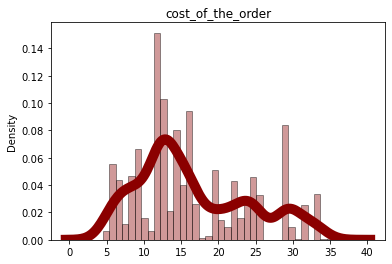

In [9]:
#pdf of cost of order
plt.title('cost_of_the_order')
sns.distplot(x=df['cost_of_the_order'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})

In [10]:
#mean of cost of order 
df['cost_of_the_order'].mean()

16.498851422550082

<AxesSubplot:xlabel='cost_of_the_order'>

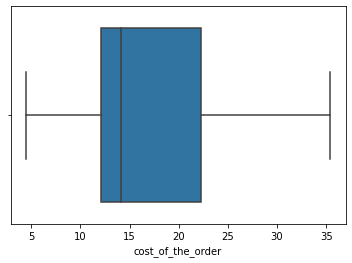

In [11]:
sns.boxplot(df["cost_of_the_order"])

<AxesSubplot:title={'center':'delivery_time'}, ylabel='Density'>

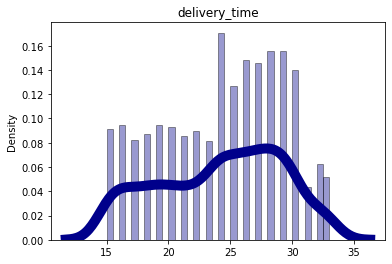

In [12]:
plt.title('delivery_time')
sns.distplot(x=df['delivery_time'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})

In [13]:
df['delivery_time'].mean()

24.161749209694417

<AxesSubplot:xlabel='delivery_time'>

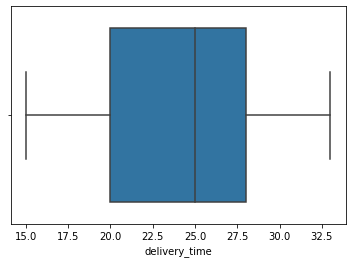

In [14]:
sns.boxplot(df["delivery_time"])

<AxesSubplot:title={'center':'food_preparation_time'}, ylabel='Density'>

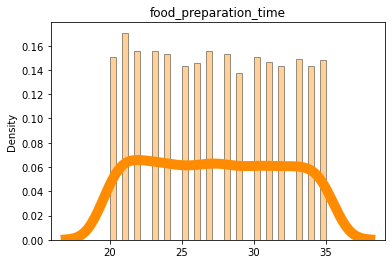

In [15]:
#pdf of food_preparation_time
plt.title('food_preparation_time')
sns.distplot(x=df['food_preparation_time'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkorange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})

In [16]:
#mean of food_preparation_time
df['food_preparation_time'].mean()

27.371970495258168

<AxesSubplot:xlabel='food_preparation_time'>

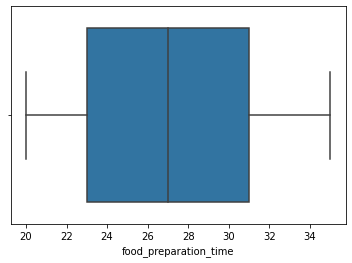

In [17]:
sns.boxplot(df["food_preparation_time"])


In [18]:
#histogram of cuisine_type
px.histogram( x = df['cuisine_type'], color_discrete_sequence=['red'])

In [19]:
px.histogram( df, x = 'rating', color_discrete_sequence=['yellow'])

# 12:Bivariate/Multivariate analysis

In [69]:
fig = px.histogram(df, x="cuisine_type", color="rating")
fig.show()

In [25]:
#sum of all the columns based on cuisine_type
df_gb = df.groupby(['cuisine_type']).sum()

In [27]:
#bar plot of total cost_of_the_order for each cuisine_type
px.bar(df_gb['cost_of_the_order'], color_discrete_sequence=['blue'])

In [84]:
#sum of all the columns based on day_of_the_week
df_gb = df.groupby(['day_of_the_week']).sum()

In [85]:
df_gb['cost_of_the_order']

day_of_the_week
Weekday     8922.22
Weekend    22392.60
Name: cost_of_the_order, dtype: float64

In [86]:
#bar plot of total cost_of_the_order for each day_of_the_week
px.bar(df_gb['cost_of_the_order'], color_discrete_sequence=['orange'])

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

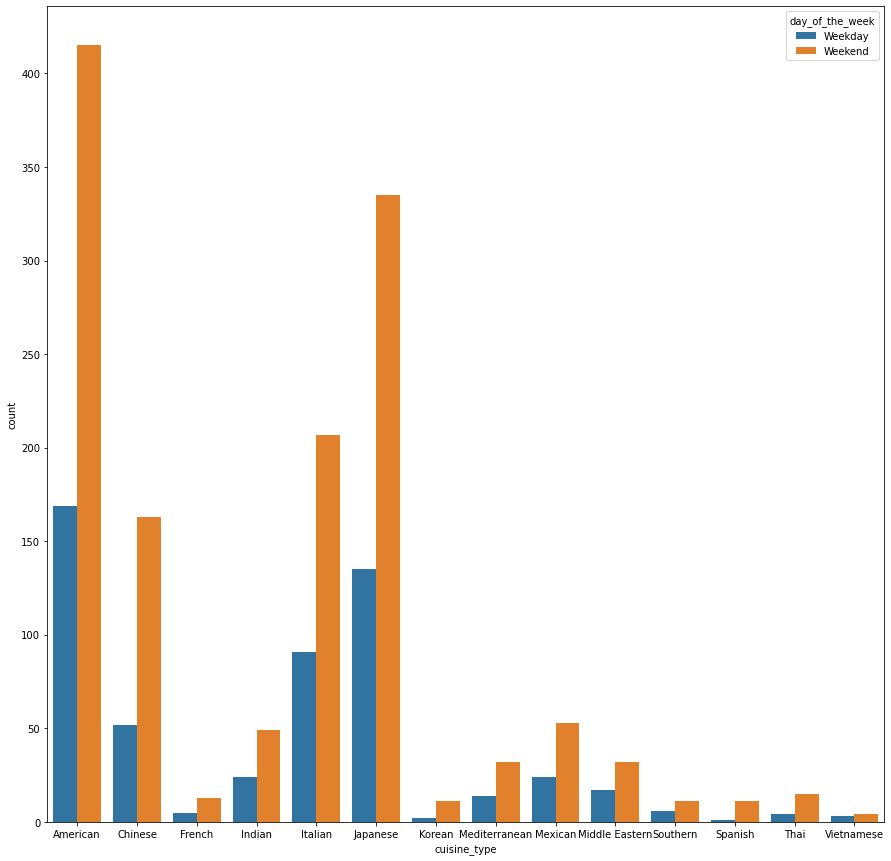

In [90]:
plt.figure(figsize=(15,15))
sns.countplot(data=df, x="cuisine_type", hue="day_of_the_week")

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

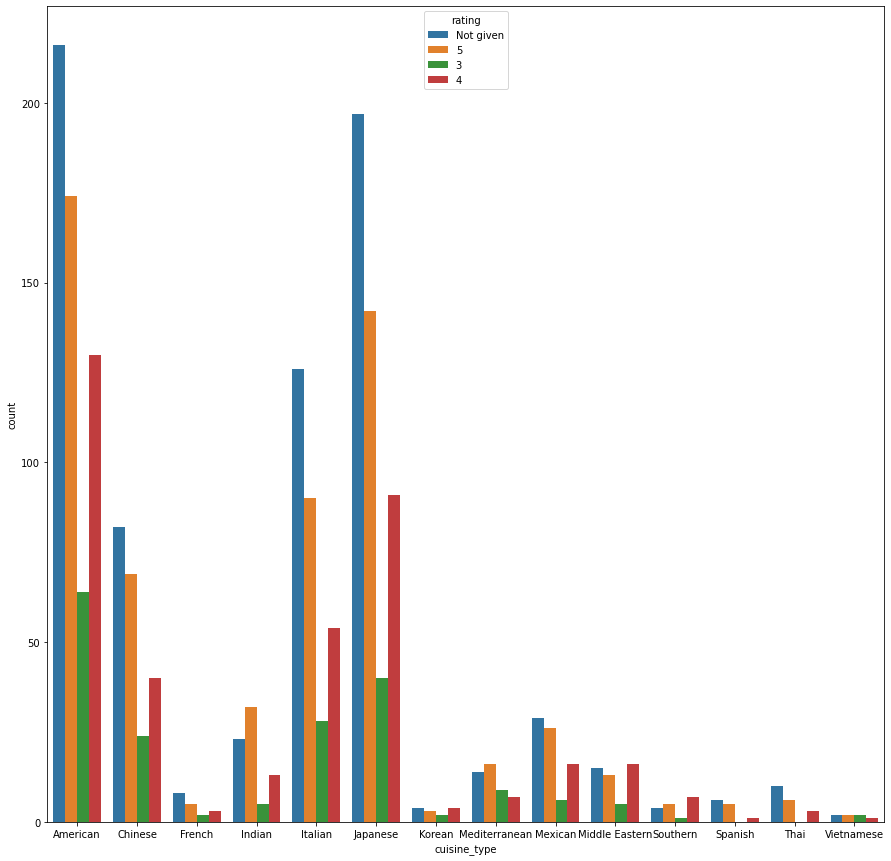

In [94]:
plt.figure(figsize=(15,15))
sns.countplot(data=df, x="cuisine_type", hue="rating")

In [51]:
#extracting numeric features to draw 2d scatter plots
num=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]

In [88]:

fig = px.scatter_matrix(num ,color_discrete_sequence=['purple'])
fig.show()